# Artificial Neural Networks

In [2]:
# Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import CategoricalCrossentropy
import numpy

In [3]:
import pandas as pd
import seaborn as sns

# Exploratory Data Analysis

In [4]:
c = pd.read_csv('Companydata.csv')
c

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [5]:
#To find whether there are any existing null values or not
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
#Count of duplicated rows
c[c.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


<AxesSubplot:>

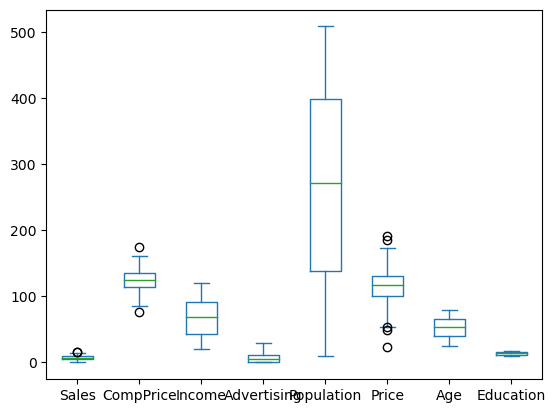

In [7]:
#Outlier Detection
c.plot(kind='box')

<AxesSubplot:>

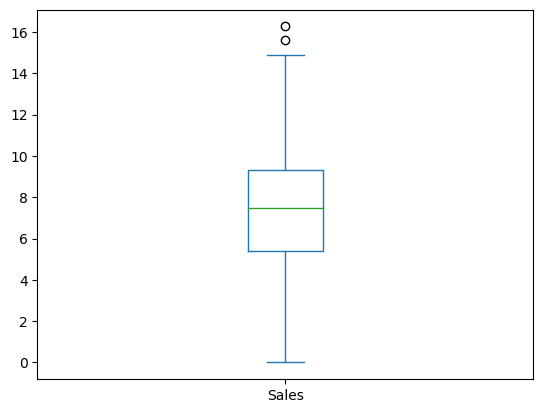

In [8]:
c.Sales.plot(kind='box')

In [9]:
c.Sales.describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [10]:
IQR = 9.320000 - 5.390000
IQR

3.9300000000000006

In [11]:
#Calculation of upper fence
upper_fence = 9.320000 + (1.5*IQR)
upper_fence

15.215000000000002

In [12]:
index=c[c.Sales>15.215000000000002].index
c = c.drop(index,axis=0)

<AxesSubplot:>

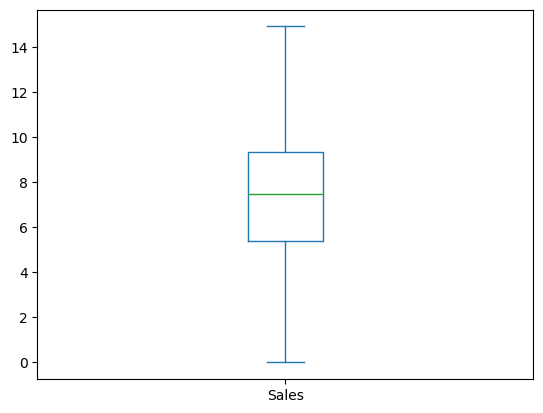

In [13]:
c.Sales.plot(kind='box')

<AxesSubplot:>

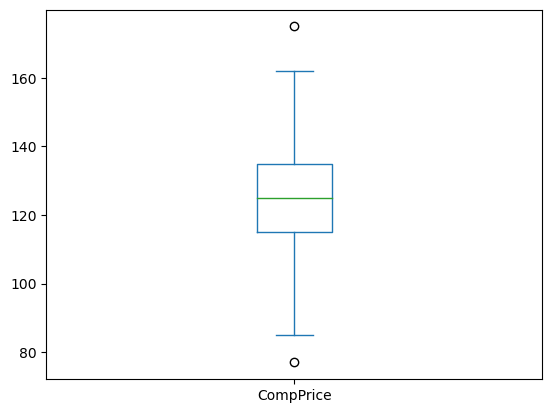

In [14]:
c.CompPrice.plot(kind='box')

In [15]:
c.CompPrice.describe()

count    398.000000
mean     124.942211
std       15.351275
min       77.000000
25%      115.000000
50%      125.000000
75%      135.000000
max      175.000000
Name: CompPrice, dtype: float64

In [16]:
IQR = 135.000000 - 115.000000
IQR

20.0

In [17]:
#Calculation of upper fence
upper_fence = 135.000000 + (1.5*IQR)
upper_fence

165.0

In [18]:
#Calculation of lower fence
lower_fence = 115.000000 - (1.5*IQR)
lower_fence

85.0

In [19]:
index=c[c.CompPrice>165.0].index
c = c.drop(index,axis=0)

In [20]:
index=c[c.CompPrice<85.0].index
c = c.drop(index,axis=0)

<AxesSubplot:>

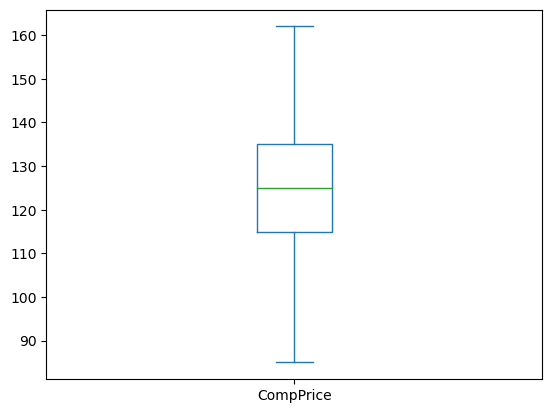

In [21]:
c.CompPrice.plot(kind='box')

<AxesSubplot:>

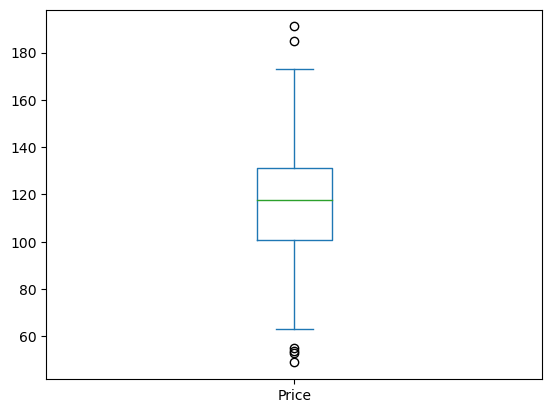

In [22]:
c.Price.plot(kind='box')

In [23]:
c.Price.describe()

count    396.000000
mean     116.070707
std       23.069077
min       49.000000
25%      100.750000
50%      117.500000
75%      131.000000
max      191.000000
Name: Price, dtype: float64

In [24]:
IQR = 131.000000 - 100.750000
IQR

30.25

In [25]:
#Calculation of upper fence
upper_fence = 131.000000 + (1.5*IQR)
upper_fence

176.375

In [26]:
#Calculation of lower fence
lower_fence = 100.750000 - (1.5*IQR)
lower_fence

55.375

In [27]:
index=c[c.Price>176.375].index
c = c.drop(index,axis=0)

In [28]:
index=c[c.Price<55.375].index
c = c.drop(index,axis=0)

<AxesSubplot:>

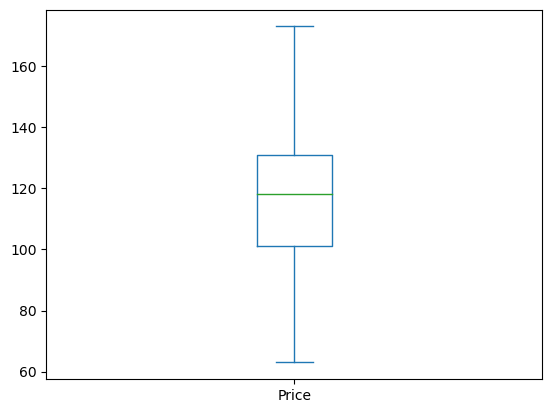

In [29]:
c.Price.plot(kind='box')

In [30]:
c.loc[c['Sales'] < 6, 'Target'] = 'Low'
c.loc[c['Sales'] >= 6, 'Target'] = 'High'
c.head(50)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Target
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,High
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low
5,10.81,124,113,13,501,72,Bad,78,16,No,Yes,High
6,6.63,115,105,0,45,108,Medium,71,15,Yes,No,High
7,11.85,136,81,15,425,120,Good,67,10,Yes,Yes,High
8,6.54,132,110,0,108,124,Medium,76,10,No,No,High
9,4.69,132,113,0,131,124,Medium,76,17,No,Yes,Low


In [31]:
#Converting the categorical data to Binary data
c['Urban'] = c['Urban'].astype('category').cat.codes
c['US'] = c['US'].astype('category').cat.codes
c['ShelveLoc'] = c['ShelveLoc'].astype('category').cat.codes
c['Target'] = c['Target'].astype('category').cat.codes
c

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Target
0,9.50,138,73,11,276,120,0,42,17,1,1,0
1,11.22,111,48,16,260,83,1,65,10,1,1,0
2,10.06,113,35,10,269,80,2,59,12,1,1,0
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1,0
396,6.14,139,23,3,37,120,2,55,11,0,1,0
397,7.41,162,26,12,368,159,2,40,18,1,1,0
398,5.94,100,79,7,284,95,0,50,12,1,1,1


In [32]:
array = c.values
X = array[:,0:10]
Y = array[:,11]
seed = 7

# Train & Test Data Split

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [34]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

# ANN Model Framework Definition

In [39]:
#adding input and 1st hidden layer
model = Sequential()
model.add(Dense(units=12,activation='relu',kernel_initializer='he_uniform',input_dim=10))
#adding 2nd hidden layer
model.add(Dense(units=8,activation='relu',kernel_initializer='he_uniform'))
#adding output layer
model.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

# Building ANN Model & Monitoring Run Time

In [91]:
%%time
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train,y_train, validation_split=0.33, epochs=100, batch_size=25)

Epoch 1/100
9/9 [==============================] - 0s 13ms/step - loss: 0.7941 - accuracy: 0.5120 - val_loss: 0.7392 - val_accuracy: 0.5631
Epoch 2/100
9/9 [==============================] - 0s 5ms/step - loss: 0.7402 - accuracy: 0.5550 - val_loss: 0.6964 - val_accuracy: 0.6311
Epoch 3/100
9/9 [==============================] - 0s 4ms/step - loss: 0.6892 - accuracy: 0.6172 - val_loss: 0.6634 - val_accuracy: 0.6602
Epoch 4/100
9/9 [==============================] - 0s 4ms/step - loss: 0.6540 - accuracy: 0.6603 - val_loss: 0.6356 - val_accuracy: 0.6893
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 0.6234 - accuracy: 0.6746 - val_loss: 0.6134 - val_accuracy: 0.6990
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 0.5998 - accuracy: 0.7081 - val_loss: 0.5942 - val_accuracy: 0.6990
Epoch 7/100
9/9 [==============================] - 0s 5ms/step - loss: 0.5775 - accuracy: 0.7321 - val_loss: 0.5782 - val_accuracy: 0.7087
Epoch 8/100
9/9 [=========

# Accuracy (Train data) using ANN Model

In [97]:
#evaluating the model for train data
scores = model.evaluate(x_train, y_train)
print("Accuracy: {:.2f}%".format(scores[1]*100))

10/10 [==============================] - 0s 1ms/step - loss: 0.1118 - accuracy: 0.9744
Accuracy: 97.44%


# Accuracy & Loss Plots

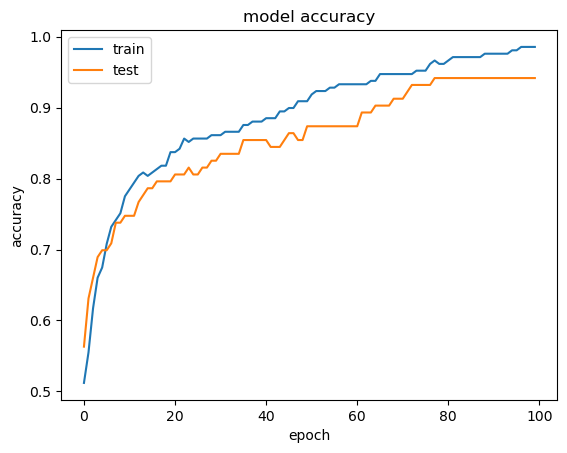

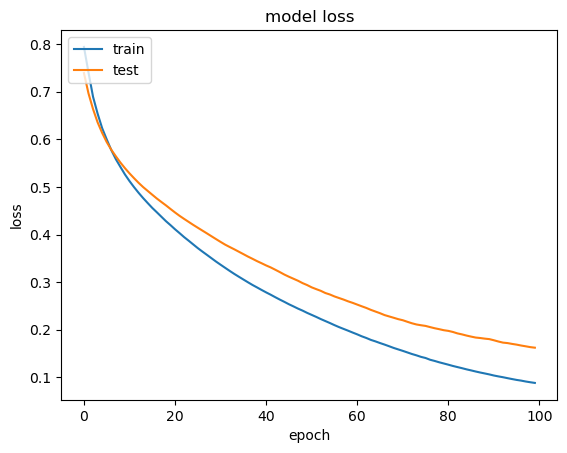

In [99]:
# summarize history for accuracy
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [100]:
y_pred=model.predict(x_test)

3/3 [==============================] - 0s 2ms/step


In [101]:
y_pred

array([[4.7599822e-01],
       [3.5716644e-03],
       [4.0971327e-06],
       [9.6085966e-01],
       [8.4957178e-04],
       [2.6737954e-04],
       [5.9057915e-01],
       [4.6648210e-01],
       [1.9925576e-01],
       [8.3736861e-01],
       [1.4894039e-02],
       [7.6126075e-01],
       [1.3977461e-01],
       [9.1368727e-02],
       [4.3563740e-03],
       [4.2413279e-02],
       [5.8203816e-02],
       [3.6139472e-03],
       [2.1639164e-01],
       [3.9753488e-01],
       [1.6225311e-01],
       [1.7781189e-02],
       [6.7286533e-03],
       [2.2279043e-03],
       [4.6854430e-01],
       [9.9961632e-01],
       [2.5141679e-04],
       [4.1477759e-03],
       [7.1205985e-04],
       [1.1037886e-01],
       [8.4594409e-05],
       [3.5098702e-01],
       [7.1810129e-05],
       [2.7803401e-02],
       [4.7389886e-01],
       [1.0002757e-03],
       [9.5178479e-01],
       [9.9610853e-01],
       [4.1010487e-03],
       [4.7879159e-03],
       [9.7406536e-01],
       [1.440233

# Accuracy (Test Data) using ANN Model

In [103]:
# evaluating the model for test data
scores = model.evaluate(x_test, y_test)
print("Accuracy: {:.2f}%".format(scores[1]*100))

3/3 [==============================] - 0s 2ms/step - loss: 0.1612 - accuracy: 0.9359
Accuracy: 93.59%
